In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_style('white')
sns.set_context('paper')
sns.set()
import random
from sklearn.manifold import TSNE

legend_size = 14

In [3]:
models = ["Mechanistic", "MechanisticGauss", "GOKU", "Latent", "Hierarchical"]
dataset = ["cvs"]
selected = models[0]
data_path =  f"./data/{dataset[0]}/results_{selected}/"
iext = np.load(data_path + 'iext.npy')
rtpr = np.load(data_path + 'rtpr.npy')
y = np.load(data_path + 'observations.npy')
times = np.load(data_path + 'times.npy')


mu_50_post = np.load(data_path + 'mu_50_post.npy')
mu_25_post = np.load(data_path + 'mu_25_post.npy')
mu_75_post = np.load(data_path + 'mu_75_post.npy')
x_post = np.load(data_path + 'solution_xt_post.npy')
x_post = np.swapaxes(x_post,1,2)

mu_50_prior = np.load(data_path + 'mu_50_prior.npy')
mu_25_prior = np.load(data_path + 'mu_25_prior.npy')
mu_75_prior = np.load(data_path + 'mu_75_prior.npy')
x_prior = np.load(data_path + 'solution_xt_prior.npy')
x_prior = np.swapaxes(x_prior,1,2)



In [4]:
#iext = (self.iext[idx] >= 0).float()  # 0 or -0.2
#rtpr = (self.rtpr[idx] > 0).float()  # 0 or 0.5
status = {
    '00': 'Combined',
    '01': 'Hemorrhagic',
    '10': 'Distributive',
    '11': 'Healthy'
    }


def get_status(iext, rtpr):
    iext = str(int(iext))
    rtpr = str(int(rtpr))
    return status[iext + rtpr]


In [5]:
mesh = np.array(np.meshgrid(np.unique(iext), np.unique(rtpr)))
cls_combinations = mesh.T.reshape(-1, 2)
print(cls_combinations)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


In [6]:
select_idx = {}
for j, c in enumerate(cls_combinations):
    sel_iext = c[0]
    sel_rtpr = c[1]
    idx = np.where((np.logical_and(iext == sel_iext, rtpr == sel_rtpr)))[0] 
    print(len(idx))
    select_idx[j] = idx

32
21
16
31


In [7]:
select_idx

{0: array([ 1,  3,  4,  7, 10, 12, 13, 21, 27, 29, 32, 35, 42, 43, 44, 54, 55,
        56, 59, 62, 63, 67, 68, 73, 78, 82, 86, 87, 88, 89, 94, 97]),
 1: array([ 0,  8, 19, 20, 23, 33, 45, 46, 47, 49, 50, 57, 64, 72, 74, 76, 77,
        81, 84, 95, 96]),
 2: array([ 2, 14, 22, 24, 25, 28, 30, 31, 34, 41, 51, 52, 65, 71, 93, 99]),
 3: array([ 5,  6,  9, 11, 15, 16, 17, 18, 26, 36, 37, 38, 39, 40, 48, 53, 58,
        60, 61, 66, 69, 70, 75, 79, 80, 83, 85, 90, 91, 92, 98])}

<Figure size 640x480 with 0 Axes>

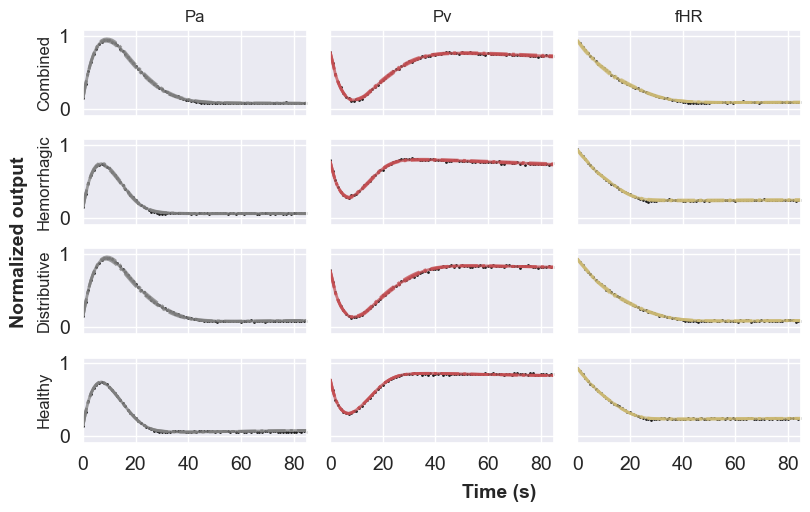

Mechanistic l1_error_prior:  0.5221143389741579


In [8]:
columns = np.arange(y.shape[1])
rows = np.arange(len(select_idx))
colors = ['tab:gray', 'r', 'y', 'c']

l1_error = 0


plt.clf()
fig, axs = plt.subplots(len(rows), len(columns), sharex=True, sharey=True, figsize=(8, 5))
fs = 14
mesh = np.array(np.meshgrid(rows, columns))
combinations = mesh.T.reshape(-1, 2)
for r, c in combinations:
    loc = select_idx[r]
    def average(data):
        return np.mean(data[loc], 0)[c, :], np.std(data[loc], 0)[c, :]
    
    
    av_mu_50, std_mu_50 = average(mu_50_prior)
    av_y = average(y)[0]
    l1_error += np.sum(np.abs(av_mu_50 -av_y))
    
    axs[r, c].plot(times, av_y, 'k.', markersize=2)
    axs[r, c].plot(times,av_mu_50, '-', lw=2, alpha=0.75, color=colors[c])
    axs[r, c].plot(times,av_mu_50 + 2 * std_mu_50, '-.', lw=2, alpha=0.75, color=colors[c])
    axs[r, c].plot(times, av_mu_50 - 2 * std_mu_50, '-.', lw=2, alpha=0.75, color=colors[c])

    axs[r, c].set_xlim(0.0, max(times) + 0.01)
    axs[r, c].set_ylim(-0.09, 1.08)
    axs[r, c].set_xticks([0, 20, 40, 60, 80])
    axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
    cols = ['Pa', 'Pv', 'fHR']
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)
    rows = [get_status(row[0], row[1]) for row in cls_combinations]
    for ax, row in zip(axs[:, 0], rows):
        ax.set_ylabel(row, rotation=90, labelpad=5, fontsize=fs-2)
        
fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs, fontweight='bold')
fig.text(0.6, -0.02, "Time (s)", ha="center", va="bottom", fontsize=fs, fontweight='bold')
fig.tight_layout()

plt.show()
l1_error = l1_error/(len(columns) * len(rows))
print(selected, "l1_error_prior: ", l1_error)

<Figure size 640x480 with 0 Axes>

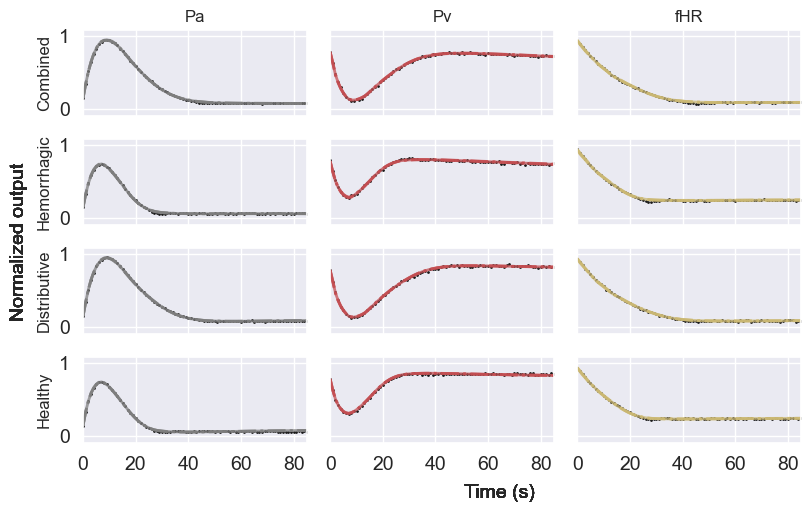

Mechanistic l1_error_post:  0.520202599465847


In [9]:
columns = np.arange(y.shape[1])
rows = np.arange(len(select_idx))
colors = ['tab:gray', 'r', 'y', 'c']

l1_error = 0


plt.clf()
fig, axs = plt.subplots(len(rows), len(columns), sharex=True, sharey=True, figsize=(8, 5))
fs = 14
mesh = np.array(np.meshgrid(rows, columns))
combinations = mesh.T.reshape(-1, 2)
for r, c in combinations:
    loc = select_idx[r]
    def average(data):
        return np.mean(data[loc], 0)[c, :], np.std(data[loc], 0)[c, :]
    
    
    av_mu_50, std_mu_50 = average(mu_50_post)
    av_y = average(y)[0]
    l1_error += np.sum(np.abs(av_mu_50 -av_y))
    
    axs[r, c].plot(times, av_y, 'k.', markersize=2)
    axs[r, c].plot(times,av_mu_50, '-', lw=2, alpha=0.75, color=colors[c])
    axs[r, c].plot(times,av_mu_50 + 2 * std_mu_50, '-.', lw=2, alpha=0.75, color=colors[c])
    axs[r, c].plot(times, av_mu_50 - 2 * std_mu_50, '-.', lw=2, alpha=0.75, color=colors[c])

    axs[r, c].set_xlim(0.0, max(times) + 0.01)
    axs[r, c].set_ylim(-0.09, 1.08)
    axs[r, c].set_xticks([0, 20, 40, 60, 80])
    axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
    cols = ['Pa', 'Pv', 'fHR']
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)
    rows = [get_status(row[0], row[1]) for row in cls_combinations]
    for ax, row in zip(axs[:, 0], rows):
        ax.set_ylabel(row, rotation=90, labelpad=5, fontsize=fs-2)
    fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs)
    fig.text(0.6, -0.02, "Time (s)", ha="center", va="bottom", fontsize=fs)
    fig.tight_layout()

plt.show()
l1_error = l1_error/(len(columns) * len(rows))
print(selected, "l1_error_post: ", l1_error)

## Plots including predicted std

Mechanistic PRIOR


<Figure size 640x480 with 0 Axes>

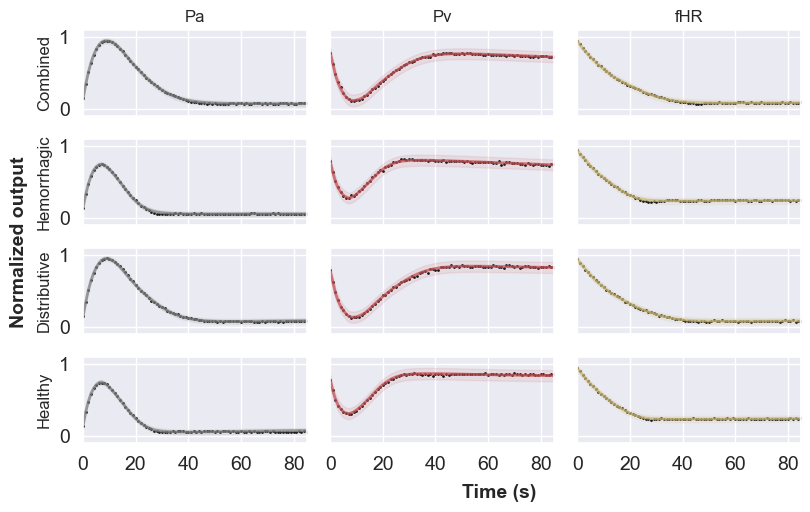

In [10]:
columns = np.arange(y.shape[1])
rows = np.arange(len(select_idx))
colors = ['tab:gray', 'r', 'y', 'c']

l1_error = 0

plt.clf()
fig, axs = plt.subplots(len(rows), len(columns), sharex=True, sharey=True, figsize=(8, 5))
fs = 14
mesh = np.array(np.meshgrid(rows, columns))
combinations = mesh.T.reshape(-1, 2)
print(selected, "PRIOR")
for r, c in combinations:
    loc = select_idx[r]
    def average(data):
        return np.mean(data[loc], 0)[c, :], np.std(data[loc], 0)[c, :]
    
    
    av_mu_50, std_mu_50 = average(mu_50_prior)
    av_y = average(y)[0]
    l1_error += np.sum(np.abs(av_mu_50 -av_y))
    
    axs[r, c].plot(times, av_y, 'k.', markersize=2, alpha=1)
    axs[r, c].plot(times,av_mu_50, '-', lw=2, alpha=0.75, color=colors[c])
    #axs[r, c].plot(times,average(mu_75_prior)[0], '-.', lw=2, alpha=0.75, color=colors[c])
   # axs[r, c].plot(times, average(mu_25_prior)[0], '-.', lw=2, alpha=0.75, color=colors[c])
    axs[r, c].fill_between(times,average(mu_75_prior)[0], average(mu_25_prior)[0],color=colors[c], alpha=0.1) 

    axs[r, c].set_xlim(0.0, max(times) + 0.01)
    axs[r, c].set_ylim(-0.09, 1.09)
    axs[r, c].set_xticks([0, 20, 40, 60, 80])
    axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
    cols = ['Pa', 'Pv', 'fHR']
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)    
    rows = [get_status(row[0], row[1]) for row in cls_combinations]
    for ax, row in zip(axs[:, 0], rows):
        ax.set_ylabel(row, rotation=90, labelpad=5, fontsize=fs-2)
fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs, fontweight='bold')
fig.text(0.6, -0.02, "Time (s)", ha="center", va="bottom", fontsize=fs, fontweight='bold')
fig.tight_layout()

plt.show()

Mechanistic PRIOR


<Figure size 640x480 with 0 Axes>

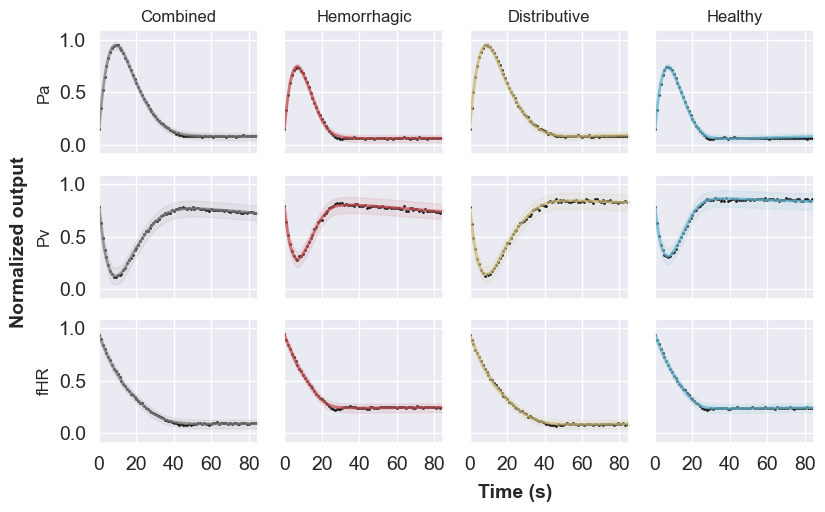

In [11]:
rows = np.arange(y.shape[1])
columns = np.arange(len(select_idx))
colors = ['tab:gray', 'r', 'y', 'c']

l1_error = 0

plt.clf()
fig, axs = plt.subplots(len(rows), len(columns), sharex=True, sharey=True, figsize=(8, 5))
fs = 14
mesh = np.array(np.meshgrid(rows, columns))
combinations = mesh.T.reshape(-1, 2)
#print("combinations: ", combinations)
print(selected, "PRIOR")
for r, c in combinations:
    loc = select_idx[c]
    #print("loc: ", loc.shape)
    def average(data):
        return np.mean(data[loc], 0)[r, :], np.std(data[loc], 0)[r, :]
    
    
    av_mu_50, std_mu_50 = average(mu_50_prior)
    av_y = average(y)[0]
    l1_error += np.sum(np.abs(av_mu_50 -av_y))
    
    axs[r, c].plot(times, av_y, 'k.', markersize=2, alpha=1)
    axs[r, c].plot(times,av_mu_50, '-', lw=2, alpha=0.75, color=colors[c])
    #axs[r, c].plot(times,average(mu_75_prior)[0], '-.', lw=2, alpha=0.75, color=colors[c])
   # axs[r, c].plot(times, average(mu_25_prior)[0], '-.', lw=2, alpha=0.75, color=colors[c])
    axs[r, c].fill_between(times,average(mu_75_prior)[0], average(mu_25_prior)[0],color=colors[c], alpha=0.1) 

    axs[r, c].set_xlim(0.0, max(times) + 0.01)
    axs[r, c].set_ylim(-0.09, 1.09)
    axs[r, c].set_xticks([0, 20, 40, 60, 80])
    axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
    rows = ['Pa', 'Pv', 'fHR']
    cols = [get_status(row[0], row[1]) for row in cls_combinations]
    #print("cols: ", cols, "rows: ", rows)
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)    
    for ax, row in zip(axs[:, 0], rows):
        ax.set_ylabel(row, rotation=90, labelpad=5, fontsize=fs-2)
fig.text(-0.02, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs, fontweight='bold')
fig.text(0.6, -0.02, "Time (s)", ha="center", va="bottom", fontsize=fs, fontweight='bold')
fig.tight_layout()

plt.show()

Mechanistic POST


<Figure size 640x480 with 0 Axes>

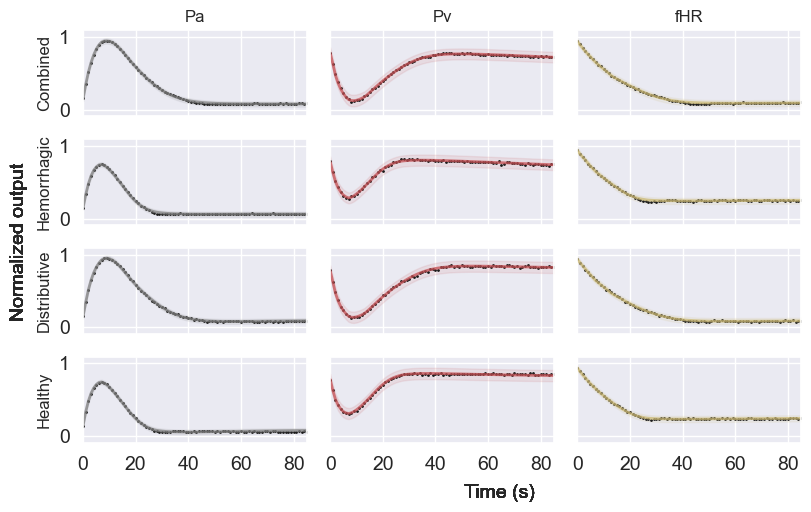

In [12]:
columns = np.arange(y.shape[1])
rows = np.arange(len(select_idx))
colors = ['tab:gray', 'r', 'y', 'c']

l1_error = 0

plt.clf()
fig, axs = plt.subplots(len(rows), len(columns), sharex=True, sharey=True, figsize=(8, 5))
fs = 14
mesh = np.array(np.meshgrid(rows, columns))
combinations = mesh.T.reshape(-1, 2)
print(selected, "POST")
for r, c in combinations:
    loc = select_idx[r]
    def average(data):
        return np.mean(data[loc], 0)[c, :], np.std(data[loc], 0)[c, :]
    
    
    av_mu_50, std_mu_50 = average(mu_50_post)
    av_y = average(y)[0]
    l1_error += np.sum(np.abs(av_mu_50 -av_y))
    
    axs[r, c].plot(times, av_y, 'k.', markersize=2, alpha=1)
    axs[r, c].plot(times,av_mu_50, '-', lw=2, alpha=0.75, color=colors[c])
    #axs[r, c].plot(times,average(mu_75_post)[0], '-.', lw=2, alpha=0.75, color=colors[c])
    #axs[r, c].plot(times, average(mu_25_post)[0], '-.', lw=2, alpha=0.75, color=colors[c])
    axs[r, c].fill_between(times,average(mu_75_post)[0], average(mu_25_post)[0],color=colors[c], alpha=0.1) 

    axs[r, c].set_xlim(0.0, max(times) + 0.01)
    axs[r, c].set_ylim(-0.09, 1.09)
    axs[r, c].set_xticks([0, 20, 40, 60, 80])
    axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
    cols = ['Pa', 'Pv', 'fHR']
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)    
    rows = [get_status(row[0], row[1]) for row in cls_combinations]
    for ax, row in zip(axs[:, 0], rows):
        ax.set_ylabel(row, rotation=90, labelpad=5, fontsize=fs-2)
    fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs)
    fig.text(0.6, -0.02, "Time (s)", ha="center", va="bottom", fontsize=fs)
    fig.tight_layout()

plt.show()

## Plot dynamics

In [13]:
print(x_post.shape, x_prior.shape)

(100, 5, 86) (100, 5, 86)


<Figure size 640x480 with 0 Axes>

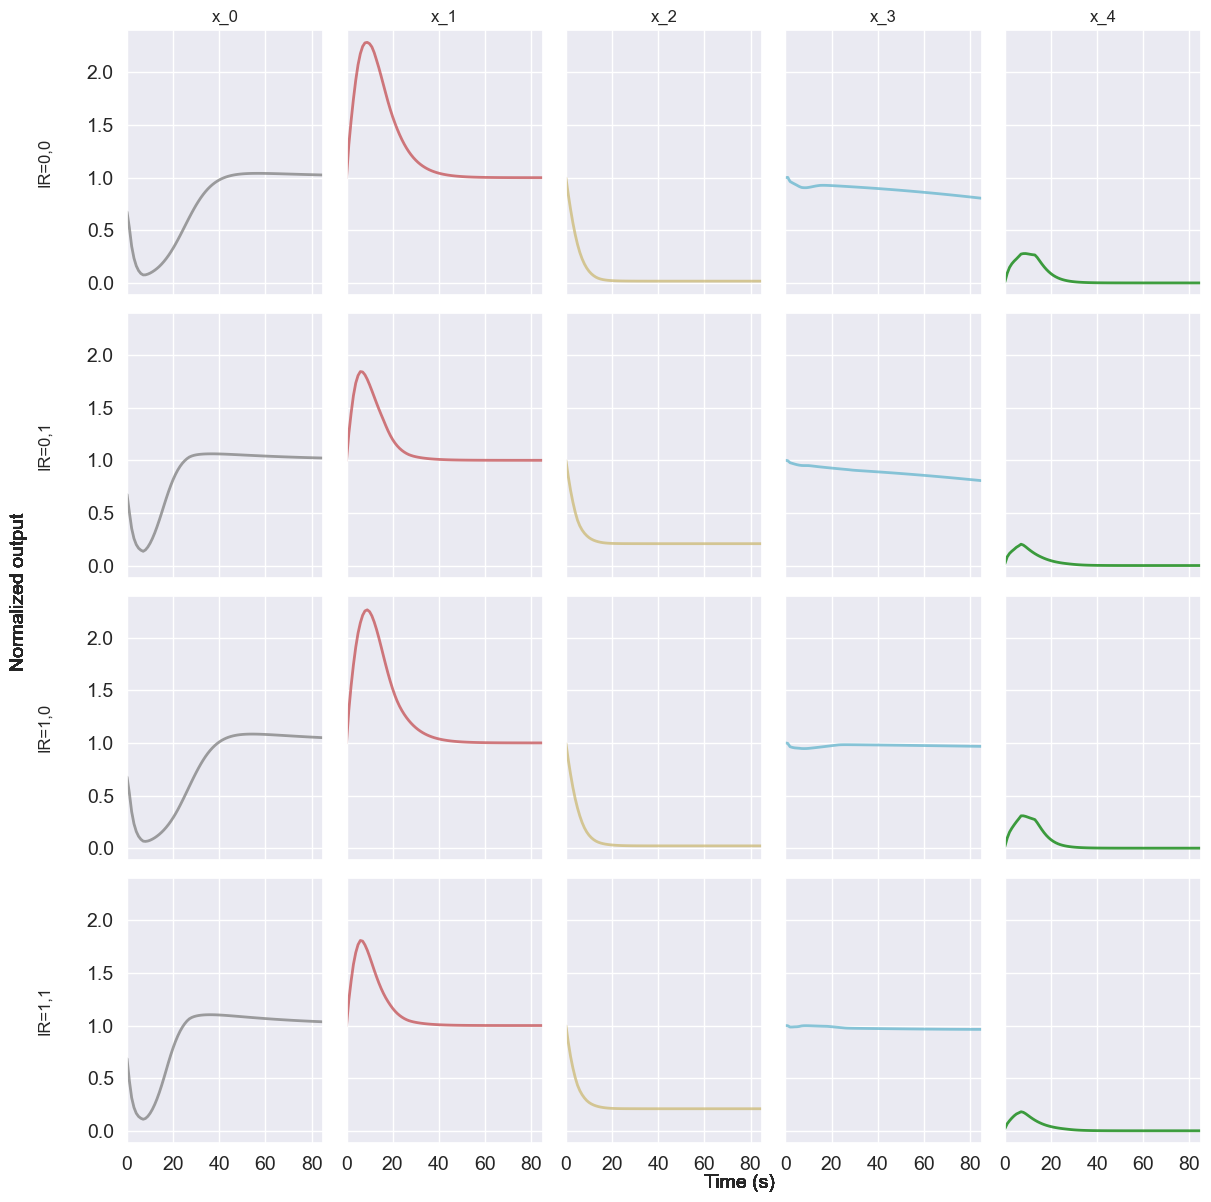

In [14]:
columns = np.arange(x_post.shape[1])
rows = np.arange(len(select_idx))
colors = ['tab:gray', 'r', 'y', 'c', 'green']


plt.clf()
fig, axs = plt.subplots(len(rows), len(columns), sharex=True, sharey=True, figsize=(12, 12))
fs = 14
mesh = np.array(np.meshgrid(rows, columns))
combinations = mesh.T.reshape(-1, 2)
for r, c in combinations:
    loc = select_idx[r]
    def average(data):
        return np.mean(data[loc], 0)[c, :]


    axs[r, c].plot(times,average(x_post), '-', lw=2, alpha=0.75, color=colors[c])
    

    axs[r, c].set_xlim(0.0, max(times) + 0.01)
   # axs[r, c].set_ylim(-0.01, 1.01)
    axs[r, c].set_xticks([0, 20, 40, 60, 80])
    axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
    cols = ['x_0', 'x_1', 'x_2',  'x_3', 'x_4', 'x_5']
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)
    rows = ["IR={},{}".format(int(row[0]), int(row[1])) for row in cls_combinations]
    for ax, row in zip(axs[:, 0], rows):
        ax.set_ylabel(row, rotation=90, labelpad=25, fontsize=fs - 2)
    fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs)
    fig.text(0.6, 0, "Time (s)", ha="center", va="bottom", fontsize=fs)
    fig.tight_layout()

plt.show()